In [1]:
# Using this dataset - https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned?resource=download

# Following the Kaggle download instructions
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the file you'd like to load
file_path = "depression_dataset_reddit_cleaned.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "infamouscoder/depression-reddit-cleaned",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

clean_text = df['clean_text']
display(clean_text[:5])

/tmp/ipython-input-1581979753.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'depression-reddit-cleaned' dataset.


0    we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat or any kind of offsite communication early in the conversion is showing either bad intention or bad judgement either way it s unwise to trust them pm me anytime seems like a kind and generous offer and it might be perfectly well meaning but unless and until a solid rapport ha been established it s just not a wise idea here are some point to consider before you offer or accept an invitation to communicate privately by posting supportive reply publicly you ll help more people than just the op if your response are of good quality you ll educate and inspire other helper the 9 90 rule http en wikipedia org wiki rule internet culture applies here a much a it doe anywhere else on the internet people who are struggling with serious mental health issue often justifiably have a low tolerance for disappointment and a high level of ever changing emotional need unless the helper is able to make a 00 commitment to be there for them in every way for a long a necessary offering a personal inbox a a resource is likely to do more harm than good this is why mental health crisis line responder usually don t give their name and caller aren t allowed to request specific responder it s much healthier and safer for the caller to develop a relationship with the agency a a whole analogously it s much safer and healthier for our ops to develop a relationship with the community a a whole even trained responder are generally not allowed to work high intensity situation alone it s partly about availability but it s mostly about wider perspective and preventing compassion fatigue if a helper get in over their head with someone whose mental health issue including suicidality which is often comorbid with depression escalate in a pm conversation it s much harder for others including the r depression and r suicidewatch moderator to help contrary to common assumption moderator can t see or police pm in our observation over many year the people who say pm me the most are consistently the one with the least understanding of mental health issue and mental health support we all have gap in our knowledge and in our ability to communicate effectively community input mitigates these limitation there s no reason why someone who s truly here to help would want to hide their response from community scrutiny if helper are concerned about their own privacy keep in mind that self disclosure when used supportively is more about the feeling than the detail and that we have no problem here with the use of alt throwaway account and have no restriction on account age or karma we all know the internet is used by some people to exploit or abuse others these people do want to hide their deceptive and manipulative response from everyone except their victim there are many of them who specifically target those who are vulnerable because of mental health issue if a helper invite an op to talk privately and give them a good supportive experience they ve primed that person to be more vulnerable to abuse

In [2]:
# Investigate the data

# Count how many records of each type, depression means is_depression = 1 and no depression means is_depression = 0

depression_count = df['is_depression'].value_counts()
print(depression_count)

is_depression
0    3900
1    3831
Name: count, dtype: int64


In [3]:
#####################################
### Import the relevant libraries ###
#####################################

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
import requests
from sentence_transformers import SentenceTransformer
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

In [4]:
# Split into train/test

df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["is_depression"]
)

# Extract training features and labels if needed. Keeping raw for future analysis
X_train_raw = df_train["clean_text"].tolist()
y_train = df_train["is_depression"].values
X_test_raw = df_test["clean_text"].tolist()
y_test = df_test["is_depression"].values

In [5]:
########################################################
### I want to do some analysis on the PCA embeddings ###
########################################################

# Also, I want to investigate how different number of components has an effect

# The pca.explained_variance_ratio returns a vector of the variance explained by each dimension
# So [0.11,0.095,0.085] means that the first dimension explains 11% of variance and so on
# explained_variance_ratio_.cumsum gives the cumulated totals, so taking the final value gives the
# total variance explained by all dimensions

import matplotlib.pyplot as plt

encoding_model = "all-MiniLM-L6-v2"
encoder = SentenceTransformer(encoding_model)
n_components = 30

X_train = encoder.encode(X_train_raw, show_progress_bar=False)
X_test = encoder.encode(X_test_raw, show_progress_bar=False)

data = np.vstack([X_train])
# PCA data
data_pca = PCA(n_components=n_components).fit(data)

print("---- n = 30 ----")

cum_sum_30 = data_pca.explained_variance_ratio_.cumsum()[-1]

print(f"Cum sum {n_components} is {cum_sum_30:.3f}")

n_components = 50

X_train = encoder.encode(X_train_raw, show_progress_bar=False)
X_test = encoder.encode(X_test_raw, show_progress_bar=False)

data = np.vstack([X_train])
# PCA data
data_pca = PCA(n_components=n_components).fit(data)

print("---- n = 50 ----")

cum_sum_50 = data_pca.explained_variance_ratio_.cumsum()[-1]

print(f"Cum sum {n_components} is {cum_sum_50:.3f}")


# n_components = 70

# X_train = encoder.encode(X_train_raw, show_progress_bar=False)
# X_test = encoder.encode(X_test_raw, show_progress_bar=False)

# data = np.vstack([X_train])
# PCA data
# data_pca = PCA(n_components=n_components).fit(data)

# print("---- n = 70 ----")

# cum_sum_70 = data_pca.explained_variance_ratio_.cumsum()[-1]

# print(f"Cum sum {n_components} is {cum_sum_70:.3f}")

# n_components = 100

# X_train = encoder.encode(X_train_raw, show_progress_bar=False)
# X_test = encoder.encode(X_test_raw, show_progress_bar=False)

# data = np.vstack([X_train])
# PCA data
# data_pca = PCA(n_components=n_components).fit(data)

# print("---- n = 100 ----")

# cum_sum_100 = data_pca.explained_variance_ratio_.cumsum()[-1]

# print(f"Cum sum {n_components} is {cum_sum_100:.3f}")

# n_components = 200

# X_train = encoder.encode(X_train_raw, show_progress_bar=False)
# X_test = encoder.encode(X_test_raw, show_progress_bar=False)

# data = np.vstack([X_train])
# PCA data
# data_pca = PCA(n_components=n_components).fit(data)

# print("---- n = 200 ----")

# cum_sum_200 = data_pca.explained_variance_ratio_.cumsum()[-1]

# print(f"Cum sum {n_components} is {cum_sum_200:.3f}")

# plt.plot([30, 50, 70, 100, 200], [cum_sum_30, cum_sum_50, cum_sum_70, cum_sum_100, cum_sum_200], marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Cumulative Explained Variance Ratio by Principal Components')
# plt.ylim(bottom=0)
# plt.show()





/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


---- n = 30 ----
Cum sum 30 is 0.435
---- n = 50 ----
Cum sum 50 is 0.540


In [6]:
##################################################
### Do the text embeddings needed for training ###
##################################################

encoding_model = "all-MiniLM-L6-v2"
encoder = SentenceTransformer(encoding_model)
n_components = 30
batch_size = 64

X_train = encoder.encode(X_train_raw, show_progress_bar=False)
X_test = encoder.encode(X_test_raw, show_progress_bar=False)

data = np.vstack([X_train])
# PCA data
data_pca = PCA(n_components=n_components).fit(data)

X_train = data_pca.transform(X_train)
X_test = data_pca.transform(X_test)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [7]:
###############################################################################################################
### Define a simple model - credit for this spec https://github.com/Tgl70/DAIR-course-NLP/blob/main/main.py ###
###############################################################################################################

print(y_train.shape, y_train[:10])
print(y_test.shape, y_test[:10])

def get_model(input_size):
    initializer = tf.keras.initializers.GlorotUniform(seed=42)
    model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(input_size,), name='input_features'),
            tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer, name='dense_1'),
            tf.keras.layers.Dense(2, activation='softmax', kernel_initializer=initializer, name='output_layer')
        ])
    print(model.summary())
    return model

(6184,) [1 0 1 0 0 0 1 0 1 0]
(1547,) [1 1 0 0 1 1 1 0 0 0]


In [8]:
##########################
### Set some variables ###
##########################

input_size = X_train.shape[1]
batch_size = 64
epochs = 6
n_classes = 2
epsilon = 0.3
alpha = 0.1
num_iter = 10

In [9]:
########################################################
### Train the base model (simple and no adversarial) ###
########################################################

model_base = get_model(input_size)

model_base.summary()

model_base.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
    )

model_base.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=epochs,
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,226 (16.51 KB)

 Trainable params: 4,226 (16.51 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,226 (16.51 KB)

 Trainable params: 4,226 (16.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7294 - loss: 0.6267 - val_accuracy: 0.9483 - val_loss: 0.3399
Epoch 2/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9541 - loss: 0.2806 - val_accuracy: 0.9502 - val_loss: 0.1712
Epoch 3/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9594 - loss: 0.1573 - val_accuracy: 0.9509 - val_loss: 0.1385
Epoch 4/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9589 - loss: 0.1326 - val_accuracy: 0.9522 - val_loss: 0.1285
Epoch 5/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.1275 - val_accuracy: 0.9548 - val_loss: 0.1242
Epoch 6/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9599 - loss: 0.1267 - val_accuracy: 0.9535 - val_loss: 0.1215


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision (macro): 0.9540
Recall (macro): 0.9533
F1-score (macro): 0.9534


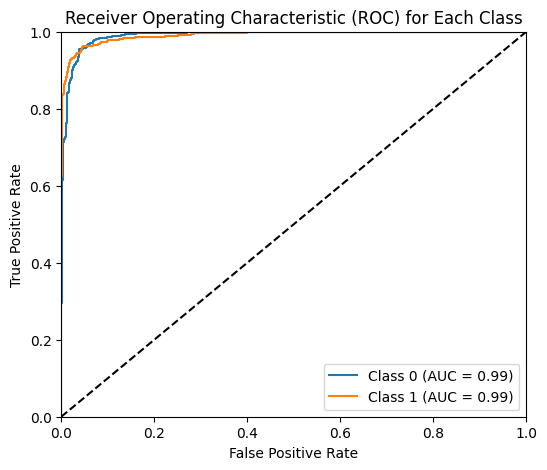

In [10]:
###############################################################
### Define the precision, recall, F1 and ROC curve function ###
###############################################################

# Taken from lab https://github.com/KatyaKom/DAIR/blob/main/Lab2/CV.ipynb

def print_metrics(model, x, y, c):
    # Get predicted probabilities for all classes
    y_pred_prob = model.predict(x)

    # Get predicted class labels (highest probability class)
    y_pred_class = np.argmax(y_pred_prob, axis=1)

    # Calculate precision, recall, and F1-score (using macro average)
    precision = precision_score(y, y_pred_class, average='macro')
    recall = recall_score(y, y_pred_class, average='macro')
    f1 = f1_score(y, y_pred_class, average='macro')

    # Display the macro/micro/weighted average metrics
    print(f'Precision (macro): {precision:.4f}')
    print(f'Recall (macro): {recall:.4f}')
    print(f'F1-score (macro): {f1:.4f}')

    y_test_bin = to_categorical(y, num_classes=c)

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(c):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])

    # Plot the ROC curve for each class
    plt.figure(figsize=(6, 5))
    for i in range(c):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) for Each Class')
    plt.legend(loc='lower right')
    plt.show()

print_metrics(model_base, X_test, y_test, 2)

In [11]:
#######################################
### Calculate the loss and accuracy ###
#######################################

loss, acc = model_base.evaluate(X_test, y_test, verbose=0)

print(f"Base model loss: {loss:.3f}")
print(f"Base model accuracy: {acc:.3f}")


Base model loss: 0.121
Base model accuracy: 0.953
